<a href="https://colab.research.google.com/github/ridvanyigit/Natural-Language-Processing-NLP-/blob/main/SpamTextMessage_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Data Loading

In [2]:
df  = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [4]:
len(df)

5572

In [5]:
df.shape

(5572, 4)

In [6]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


##Dataset Balancing


In [7]:
ham = df[df['label']=='ham']
ham.shape

(4825, 4)

In [8]:
spam = df[df['label']=='spam']
spam.shape

(747, 4)

In [9]:
ham = ham.sample(spam.shape[0])

In [10]:
ham.shape

(747, 4)

In [11]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [12]:
data.shape

(1494, 4)

In [13]:
data.sample(5)

,label,message,length,punct
220,ham,"Hi , where are you? We're at and they're not ...",136,8
596,ham,I don't know jack shit about anything or i'd s...,193,3
1082,spam,Babe: U want me dont u baby! Im nasty and have...,152,7
963,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,122,1
435,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,82,2


##Exploratory Data Analysis

In [14]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (6, 3)
plt.style.use('ggplot')

In [15]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

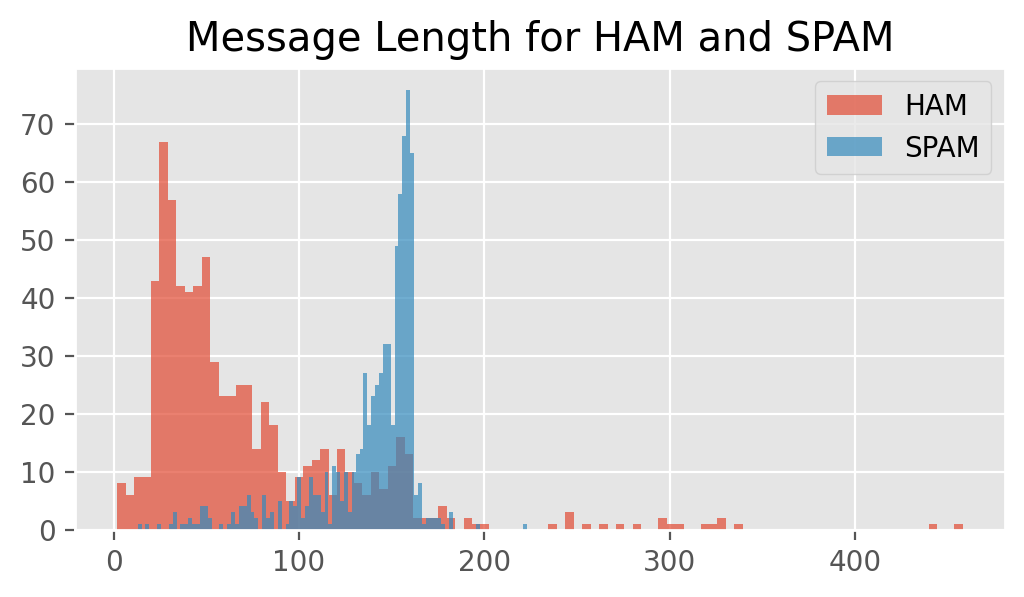

In [16]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

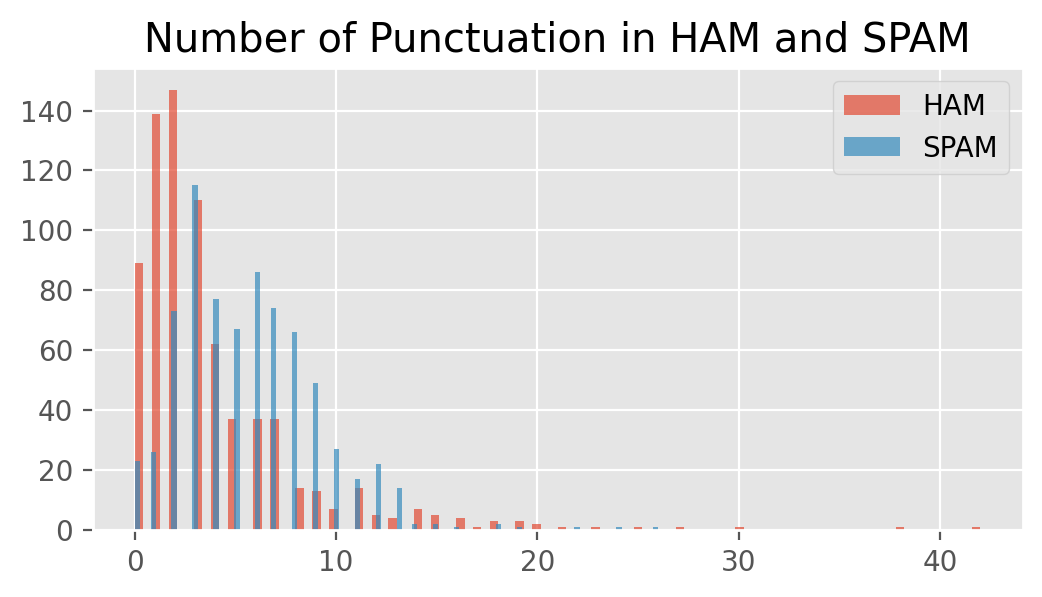

In [17]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

##Data Preparation for Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
data.head()

,label,message,length,punct
0,ham,Yup,3,0
1,ham,"Ha ha nan yalrigu heltini..Iyo kothi chikku, u...",255,21
2,ham,"Yes, princess. Toledo.",22,3
3,ham,:),3,2
4,ham,"Hey babe, sorry i didn't get sooner. Gary can ...",327,14


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['message'],
                                                    data['label'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=data['label']
                                                    )

X_train.shape, X_test.shape

((1195,), (299,))

Bag of Words Creation

In [21]:
vectorizer = TfidfVectorizer()

In [22]:
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [23]:
X_train_bow.shape, X_test_bow.shape

((1195, 4026), (299, 4026))

In [24]:
X_train_bow

<1195x4026 sparse matrix of type '<class 'numpy.float64'>'
	with 20204 stored elements in Compressed Sparse Row format>

##Model Building (Pipeline and RandomForest)

In [25]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [26]:
y_pred = clf.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[147,   3],
       [ 15, 134]])

In [28]:
accuracy_score(y_test, y_pred)

0.939799331103679

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       150
        spam       0.98      0.90      0.94       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



In [30]:
clf.predict(['you have won lottery ticket worth $1000, please click here to claim',
             'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)

In [31]:
clf.classes_

array(['ham', 'spam'], dtype=object)

##Save and Load Model

In [32]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [33]:
model = pickle.load(open('model.pkl', 'rb'))

In [34]:
model.predict(['you have won lottery ticket worth $1000, please click here to claim',
            'hi, how are you doing today?'])

array(['spam', 'ham'], dtype=object)